This notebook takes a look at accessing some of the data available on UCAR's THREDDS Server using Siphon.

Here we will be looking at the Real-Time Mesoscale Analysis (RTMA) dataset and how to plot it interactively in a notebook using holoviews and bokeh!

This will allow us to not only visualize the data onto a geographic map, but also interact with it through Bokeh. Let's take a look at how this is done!

In [1]:
#Load in packages
from siphon.catalog import TDSCatalog, Dataset
import pandas as pd
import numpy as np
import metpy
import cartopy.crs as ccrs
import holoviews as hv
from holoviews import opts
import xarray as xr
import hvplot.xarray 
from geoviews import tile_sources as gvts
import panel as pn

Now that we have everything loaded, we need to set the backend for our holoviews (hv) plot. Typically we use **'matplotlib'** as the backend, however in this case we will use **'bokeh'** since we want an interactive plot. We will also set the output size of the plot to **250**.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
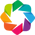

In [2]:
hv.extension('bokeh')
hv.output(size=250)

Now we need to set an instance of the **TDSCatalog** from Unidata. We are looking at the RTMA data, which can be found under the Forecast Products and Analyses directory.

I will not be going into detail on **Siphon** here, however you can find some very helpful notebooks on using siphon to search for, parse, and access data thanks to the folks at Unidata here: https://unidata.github.io/pyaos-ams-2021/resources.html

In [3]:
#Get the list of current files on the THREDDS server
#Note that the TDSCatalog takes the url of the folder you want the files from as an argument
cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/latest.xml')

In [4]:
#Now let's look at the dataset that are available
cat.datasets

['RTMA_CONUS_2p5km_20210528_1800.grib2']

We are grabbing the latest dataset that is available for our plotting purposes. Now let's access it using **OPENDAP**. We can access it using the *use_xarray* option in Siphon's *remote_access* function, however it is currently unable to parse RTMA data successfully. 

In [5]:
nc2 = cat.datasets[0].access_urls
nc3 = xr.open_dataset(nc2['OPENDAP']).metpy.parse_cf() # Parse with metpy to make it easier to plot
nc3 = nc3.metpy.assign_latitude_longitude() # Latitude and Longitude are not included, so have metpy add them

Let's take a look at the variables that are available to us in the file:

In [6]:
list(nc3.keys())

['LambertConformal_Projection',
 'time1_bounds',
 'Dewpoint_temperature_error_height_above_ground',
 'Dewpoint_temperature_Analysis_height_above_ground',
 'Geopotential_height_Analysis_surface',
 'Pressure_error_surface',
 'Pressure_Analysis_surface',
 'Temperature_error_height_above_ground',
 'Temperature_Analysis_height_above_ground',
 'Total_cloud_cover_Analysis_entire_atmosphere_single_layer',
 'Total_cloud_cover_error_entire_atmosphere_single_layer',
 'Total_precipitation_Forecast_altitude_above_msl_1_Hour_Accumulation',
 'Visibility_Analysis_surface',
 'Visibility_error_surface',
 'Wind_direction_from_which_blowing_error_height_above_ground',
 'Wind_direction_from_which_blowing_Analysis_height_above_ground',
 'Wind_speed_error_height_above_ground',
 'Wind_speed_Analysis_height_above_ground',
 'Wind_speed_gust_error_height_above_ground',
 'Wind_speed_gust_Analysis_height_above_ground',
 'u-component_of_wind_Analysis_height_above_ground',
 'v-component_of_wind_Analysis_height_above

We have a lot of different Analysis available to us to plot on our map! Let's look at the Temperature analysis

In [7]:
nc3['Temperature_Analysis_height_above_ground']

<xarray.DataArray 'Temperature_Analysis_height_above_ground' (time: 1, height_above_ground: 1, y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
    reftime              datetime64[ns] 2021-05-28T18:00:00
  * x                    (x) float32 -2.763e+06 -2.761e+06 ... 2.682e+06
  * y                    (y) float32 -2.638e+05 -2.612e+05 ... 3.231e+06
  * time                 (time) datetime64[ns] 2021-05-28T18:00:00
  * height_above_ground  (height_above_ground) float32 2.0
    metpy_crs            object Projection: lambert_conformal_conic
    latitude             (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude            (y, x) float64 -121.6 -121.5 -121.5 ... -60.92 -60.89
Attributes:
    long_name:                      Temperature Analysis @ Specified height l...
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-0-0_L103
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               103
    Grib2_Level_Desc:               Specified height level above ground
    Grib2_Generating_Process_Type:  Analysis

The temperature analysis is available in 4-dimensions (time, height_above_ground,y,x). Since we added in the latitude and longitude coordinates earlier, we will be able to substitute them in for the y and x dimensions. 

Both the time and height_above_ground dimensions have 1 value, which makes our analysis even easier for the plotting program.

Under the attributes, note that the temperature is in *kelvin*, let's change that over the *celsius*. 

To do this, we need to find the indices of each variable that has temperature in it. Note that in the above variables temperature is found as both **Temperature** and **temperature**, so we will need to search for both using list comprehension.

In [8]:
inds = []
[inds.append(x) for x in nc3.variables if 'Temperature' in x or 'temperature' in x]
for ind in inds:
    nc3[ind] = nc3[ind]-273.15
    nc3[ind].attrs['units'] = 'C'
nc3['Temperature_Analysis_height_above_ground']

<xarray.DataArray 'Temperature_Analysis_height_above_ground' (time: 1, height_above_ground: 1, y: 1377, x: 2145)>
array([[[[19.580017, 19.580017, 19.580017, ..., 27.390015, 27.390015,
          27.390015],
         [19.580017, 19.580017, 19.580017, ..., 27.390015, 27.390015,
          27.390015],
         [19.580017, 19.5     , 19.5     , ..., 27.390015, 27.390015,
          27.390015],
         ...,
         [ 9.890015,  9.890015,  9.809998, ...,  5.100006,  5.100006,
           5.100006],
         [ 9.820007,  9.820007,  9.820007, ...,  5.100006,  5.100006,
           5.100006],
         [ 9.830017,  9.830017,  9.820007, ...,  5.100006,  5.100006,
           5.100006]]]], dtype=float32)
Coordinates:
    reftime              datetime64[ns] 2021-05-28T18:00:00
  * x                    (x) float32 -2.763e+06 -2.761e+06 ... 2.682e+06
  * y                    (y) float32 -2.638e+05 -2.612e+05 ... 3.231e+06
  * time                 (time) datetime64[ns] 2021-05-28T18:00:00
  * height_above_ground  (height_above_ground) float32 2.0
    metpy_crs            object Projection: lambert_conformal_conic
    latitude             (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude            (y, x) float64 -121.6 -121.5 -121.5 ... -60.92 -60.89
Attributes:
    units:    C

Now that we have this in useful units, let's plot the dataset in holoviews with bokeh!

To use holoviews with bokeh effectively, we need to declare some functions: **one for plotting** and **one for selecting the variable**. Holoviews/bokeh allows plots to be updated through the use of widgets which can correspond to one or more of the dimensions of the dataarray.

## Plotting Function

In [9]:
def plot(var=None):
    # Choose the basemap from geoviews tile_source
    base_map = gvts.StamenTerrain
    
    # Create a hvplot quadmesh, call is similar to xarray.plot()
    # For each variable, we want all the values for each dimension, except for 
    #      height_above_ground since it can only take on one value
    # We want to plot the variable on a lat/lon grid, so we set x and y to lon/lat.
    # Rasterize = True helps to speed up the plotting/display
    #
    # For our example, we are only using one time step. If we had more than one time step, 
    #      the groupby call would make a holoviews widget next to the graph that would
    #      allow for the time to be changed and the plot would then update.
    mesh = nc3[var][:,0,:,:].hvplot.quadmesh(x='longitude', y='latitude',
                                rasterize=True, geo=True, title=' '.join(var.split('_')[0:2]),
                                crs=ccrs.PlateCarree(),
                                groupby=list(nc3[var].dims[0:1]), 
                                cmap='jet').opts(frame_width=200, 
                                frame_height=200, colorbar=True, axiswise=True)
    
    # Now we want to overlay the hvplot.quadmesh onto the basemap and include the wheel_zoom tool
    #     from Bokeh to allow the user to zoom in and out on the map. NOTE: There are many other
    #     Bokeh tools that can be used, see the Bokeh documentation for more info:
    #     https://docs.bokeh.org/en/latest/docs/user_guide/tools.html
    overlay = (base_map * mesh.opts(alpha=0.7)).opts(active_tools=['wheel_zoom'])
    
    # Return the holoviews plot
    return overlay

## Variable Select Widget and Function

Now that we have the plotting function, let's see how to call it.

To do this, we need to provide a variable to the plotting function. To get this variable
    we need to create a widget that displays the variables available in the dataset
    and a function that updates the plot when a new variable is selected

In [10]:
# Widget to select the variable. We start with a panel Select widget
# We provide the name for it to display above it (name), the options within it,
#     and the starting value when it loads. NOTE: We are taking variables after
#     the first 2 in the list since the first two describe the projection and 
#     time boundaries.
var_select = pn.widgets.Select(name='Variables:', options=list(nc3.keys())[2:], 
                               value='Temperature_Analysis_height_above_ground')

# Define a function to call the plotting function when a new variable is chosen
def on_var_select(event):
    var = event.obj.value
    dashboard[-1] = plot(var=var)

# Function to watch the var_select widget event and call the on_var_select function 
#     when it is updated.
var_select.param.watch(on_var_select, parameter_names=['value']);

## Dashboard

Now that we have our plotting and variable select functions/widgets created, we can put them all together into a dashboard.

A holoviews dashboard is a clean way to layout the plots and widgets and connect their interactions to each other.

In [11]:
# Create the dashboard. We want them to be organized in a column, with the variable select
#     menu on the top and the plot below it

# Please note that using this in browser, changing variables may not work. Download this notebook and run it on your own
#     to experience the full effects!
dashboard = pn.Column(var_select, plot(var_select.value))
dashboard

Column
    [0] Select(name='Variables:', options=['Dewpoint_temperature_err...], value='Temperature_Analysis_heig...)
    [1] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='GRIB forecast o..., options=[numpy.datetime64('2021-05...], value=numpy.datetime64('2021-05-..., width=250)
            [1] VSpacer()